# Time v/s ensemble averages

- Experimenting with ideas in this TEDx Talk: https://www.youtube.com/watch?v=LGqOH3sYmQA&feature=youtu.be
- and this blog post https://ergodicityeconomics.com/2017/08/14/wealth-redistribution-and-interest-rates/
- and this paper: https://www.nature.com/articles/s41567-019-0732-0

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
win_return = 0.5 #50% increaase
loss_return = -0.4 #40% return
win_rate = 0.5 #50% ratio of winning
starting_capital = 100

In [84]:
n_ensembles = 1000
t = 100
ensembles = np.empty((n_ensembles, t))
ensembles[:,0] = starting_capital

In [85]:
for i in range(1,t):
    for n in range(n_ensembles):
        if np.random.random()>win_rate:
            new_money = ensembles[n, i-1]*(1+win_return)
        else:
            new_money = ensembles[n, i-1]*(1+loss_return)
        ensembles[n, i] = new_money
    if(i%10000==0):
        print(i)

In [86]:
last_time_slice = ensembles[:,t-1]

In [87]:
mean_path = np.mean(ensembles, axis=0)

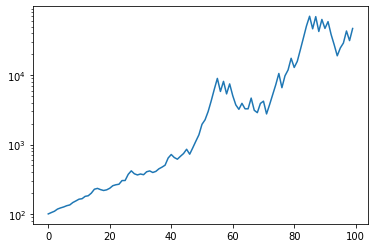

In [88]:
plt.plot(range(t), mean_path)
plt.yscale('log')
plt.show()

In [89]:
# Ensemble statistics
avg = round(last_time_slice.mean(),2)
print("Max: ", round(last_time_slice.max(),2))
print("Top 5 percentile", round(np.percentile(last_time_slice, 95),2))
print("Mean: ", avg)
print("Median: ", round(np.median(last_time_slice),2))
print("% poorer: ",round(100*sum(last_time_slice<starting_capital)/n_ensembles), "%")
print("% below avg: ",round(100*sum(last_time_slice<avg)/n_ensembles), "%")

Max:  31248874.97
Top 5 percentile 524.27
Mean:  46952.41
Median:  0.86
% poorer:  89.0 %
% below avg:  99.0 %


## Switching ensembles and time

i.e Letting it run for a much longer time

In [90]:
n_ensembles = 100
t = 1000
ensembles = np.empty((n_ensembles, t))
ensembles[:,0] = starting_capital

In [91]:
for i in range(1,t):
    for n in range(n_ensembles):
        if np.random.random()>win_rate:
            new_money = ensembles[n, i-1]*(1+win_return)
        else:
            new_money = ensembles[n, i-1]*(1+loss_return)
        ensembles[n, i] = new_money
    if(i%100==0):
        print(i)

100
200
300
400
500
600
700
800
900


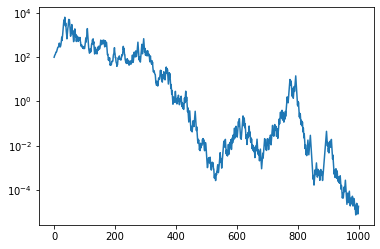

In [92]:
last_time_slice = ensembles[:,t-1]
mean_path = np.mean(ensembles, axis=0)
plt.plot(range(t), mean_path)
plt.yscale('log')
plt.show()

In [93]:
# Ensemble statistics
avg = round(last_time_slice.mean(),2)
print("Max: ", round(last_time_slice.max(),2))
print("Top 5 percentile", round(np.percentile(last_time_slice, 95),2))
print("Mean: ", avg)
print("Median: ", round(np.median(last_time_slice),2))
print("% poorer: ",round(100*sum(last_time_slice<starting_capital)/n_ensembles), "%")
print("% below avg: ",round(100*sum(last_time_slice<avg)/n_ensembles), "%")

Max:  0.0
Top 5 percentile 0.0
Mean:  0.0
Median:  0.0
% poorer:  100.0 %
% below avg:  0.0 %
